# Linear regression using python

Linear regression is the process of fitting a linear equation to a set of sample data, in order to predict the output.

In order to do this, we assume that the input `X`, and the output `Y` have a linear relationship.

> `X` and `Y` may or may not have a linear relationship. We just want to find the _closest_ linear relationship between them, in order to explain the data that we observe.

We can get a better understanding of linear regression from the following chart:

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

import matplotlib.pyplot as plt
import numpy as np
from generate_dataset import generate_dataset as gd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

In [30]:
def generate_dataset_simple(beta, n, std_dev):
  x = np.random.random_sample(n) * 100
  e = np.random.randn(n) * std_dev
  y = x * beta + e
  # We need to reshape x to be a 2-d matrix with n rows and 1 column
  # This is so that it can take a generalized form that can be expanded
  # to multiple predictors for the `LinearRegression` model
  return x.reshape(n, 1), y

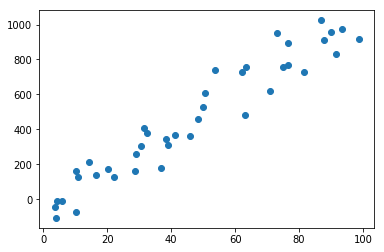

In [31]:
beta = 10
x, y = generate_dataset_simple(beta, 50, 100)

# Take the first 40 samples to train, and the last 10 to test
x_train = x[:-10]
y_train = y[:-10]

x_test = x[-10:]
y_test = y[-10:]

plt.scatter(x_train,y_train)
plt.show()

In [32]:
# Import, and create an instance of a simple least squares regression model
from sklearn import linear_model
model = linear_model.LinearRegression()

# Train the model using the training data that we created
model.fit(x_train, y_train)
print('Coefficients: \n', model.coef_)

# We then use the model to make predictions based on the test values of x
y_pred = model.predict(x_test)

# Now, we can calculate
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [11.04668525]
Mean squared error: 6455.56
Variance score: 0.95


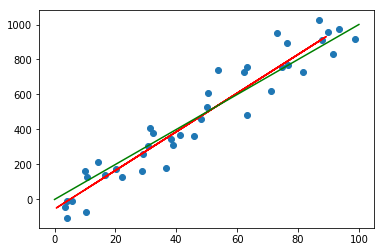

In [33]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='red')
x_actual = np.array([0, 100])
y_actual = x_actual*beta
plt.plot(x_actual, y_actual, color='green')
plt.show()

In [34]:
def generate_dataset(coeffs, n, std_dev):
  # We calculate the number of predictors, and create a coefficient matrix
  # With `p` rows and 1 column, for matrix multiplication
  p = len(coeffs)
  coeff_mat = np.array(coeffs).reshape(p, 1)
  # Similar as before, but with `n` rows and `p` columns this time
  x = np.random.random_sample((n, p))* 100
  e = np.random.randn(n) * std_dev
  # Since x is a n*p matrix, and coefficients is a p*1 matrix
  # we can use matrix multiplication to get the value of y for each
  # set of values x1, x2 .. xp
  # We need to transpose it to get a 1*n array from a n*1 matrix to use in the regression model
  y = np.matmul(x, coeff_mat).transpose() + e
  return x, y

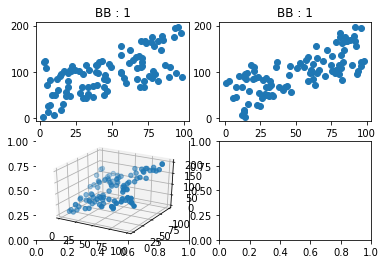

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from generate_dataset import generate_dataset as gd
from matplotlib import pyplot as plt

predictor_coeffs =[1, 1]
std_dev = 10
n = 100

X, Y = gd(predictor_coeffs, n, std_dev)

f, [[p1, p2], [p3, p4]] = plt.subplots(2,2)

p1.scatter(X[:,0], Y)
p1.set_title("BB : " + str(predictor_coeffs[0]))

p2.scatter(X[:,1], Y)
p2.set_title("BB : " + str(predictor_coeffs[1]))

p3 = f.add_subplot(223, projection='3d')
p3.scatter(X[:,0], X[:,1], Y)
p3.set_title("")

plt.show()